# Author: Seunghee Kim
- Created on: 2024-11-20

## Notebook Explain  
1_dataset_preprocess.ipynb의 결과로 나오게 된 df_human_train.csv, df_human_valid.csv, df_human_test.csv 데이터셋에 대해서, 동일한 'essay_prompt'를 OpenAI의 GPT-4o-mini 모델에게 제공해서 AI-Generated Text를 얻는 코드

# Import Library

In [1]:
import os
import pandas as pd
from tqdm import tqdm
import yaml
from openai import OpenAI

# Config & Path

In [2]:
class CFG:
    SEED = 1
    MODEL = "gpt-4o-mini"
    
    # api key가 담긴 yaml파일 (해당 yaml 파일은 .gitignore에 반드시 추가해야 함!!!)
    API_CONFIG_PATH = './config.yaml'
    
    # 1_dataset_preprocess.ipynb의 결과로 나온 전처리된 Human Dataset 경로
    DF_HUMAN_TRAIN_PATH = './df_human_train.csv'
    DF_HUMAN_VALID_PATH = './df_human_valid.csv'
    DF_HUMAN_TEST_PATH = './df_human_test.csv'
    
    # AI-Generated Text까지 포함된 csv파일의 output 경로
    DF_HUMAN_AI_TRAIN_PATH = './df_human_ai_train.csv'
    DF_HUMAN_AI_VALID_PATH = './df_human_ai_valid.csv'
    DF_HUMAN_AI_TEST_PATH = './df_human_ai_test.csv'
    
    # Final Dataset output 경로 (Human Text, AI Text, Label 존재)
    DF_FINAL_TRAIN_PATH = './df_final_train.csv'
    DF_FINAL_VALID_PATH = './df_final_valid.csv'
    DF_FINAL_TEST_PATH = './df_final_test.csv'

# Load OpenAI API Key

In [3]:
# yaml파일에 존재하는 api key를 load 하는 함수
def load_api_key(yaml_file):
    with open(yaml_file, 'r', encoding='utf-8') as file:
        config = yaml.safe_load(file)
    return config['openai']['api_key_ksh']

api_key = load_api_key(CFG.API_CONFIG_PATH)
client = OpenAI(api_key=api_key)

# Make AI-Generated Text

### Train Dataset

In [4]:
train_dataset = pd.read_csv(CFG.DF_HUMAN_TRAIN_PATH)
train_dataset['AI_Generated_Text'] = ""

for idx, row in tqdm(train_dataset.iterrows(), total=len(train_dataset)):
    input_text = row['essay_prompt']
    student_grade = row['student_grade']
    school, grade = student_grade.split('_')
    if school == '중등':
        school = school[0] # 중등인 경우 '중'만 가져옴
    
    # 학교 수준에 따라 다르게 설정하는 시스템 프롬프트
    # ex) "너는 대한민국의 고등학교 2학년 학생이다."
    grade_system_prompt = f"대한민국의 {school}학교 {grade} 학생 수준으로 답하시오. 마크다운 용법을 사용하지 말고 학생이 글을 쓰듯이 답하시오."
    # print(grade_system_prompt)
    # print('=================')
    # print(input_text)
    # print('=================')
    response = client.chat.completions.create(
        model=CFG.MODEL,
        messages=[
            {"role": "system", "content": grade_system_prompt},
            {"role": "user", "content": input_text}
        ]
    )
    
    llm_output = response.choices[0].message.content
    # print(llm_output)
    # print('=================')
    # LLM이 생성한 Text를 'AI_Generated_Text' 열에 추가
    train_dataset.at[idx, 'AI_Generated_Text'] = llm_output

train_dataset.to_csv(CFG.DF_HUMAN_AI_TRAIN_PATH, index=False)

100%|██████████| 4500/4500 [7:48:37<00:00,  6.25s/it]  


### Valid Dataset

In [5]:
valid_dataset = pd.read_csv(CFG.DF_HUMAN_VALID_PATH)
valid_dataset['AI_Generated_Text'] = ""


for idx, row in tqdm(valid_dataset.iterrows(), total=len(valid_dataset)):
    input_text = row['essay_prompt']
    student_grade = row['student_grade']
    school, grade = student_grade.split('_')
    if school == '중등':
        school = school[0] # 중등인 경우 '중'만 가져옴
    
    # 학교 수준에 따라 다르게 설정하는 시스템 프롬프트
    # ex) "너는 대한민국의 고등학교 2학년 학생이다."
    grade_system_prompt = f"대한민국의 {school}학교 {grade} 학생 수준으로 답하시오. 마크다운 용법을 사용하지 말고 학생이 글을 쓰듯이 답하시오."
    # print(grade_system_prompt)
    # print('=================')
    # print(input_text)
    # print('=================')
    response = client.chat.completions.create(
        model=CFG.MODEL,
        messages=[
            {"role": "system", "content": grade_system_prompt},
            {"role": "user", "content": input_text}
        ]
    )
    
    llm_output = response.choices[0].message.content
    # print(llm_output)
    # print('=================')
    # LLM이 생성한 Text를 'AI_Generated_Text' 열에 추가
    valid_dataset.at[idx, 'AI_Generated_Text'] = llm_output


valid_dataset.to_csv(CFG.DF_HUMAN_AI_VALID_PATH, index=False)

100%|██████████| 450/450 [43:17<00:00,  5.77s/it] 


### Test Dataset

In [6]:
test_dataset = pd.read_csv(CFG.DF_HUMAN_TEST_PATH)
test_dataset['AI_Generated_Text'] = ""


for idx, row in tqdm(test_dataset.iterrows(), total=len(test_dataset)):
    input_text = row['essay_prompt']
    student_grade = row['student_grade']
    school, grade = student_grade.split('_')
    if school == '중등':
        school = school[0] # 중등인 경우 '중'만 가져옴
    
    # 학교 수준에 따라 다르게 설정하는 시스템 프롬프트
    # ex) "너는 대한민국의 고등학교 2학년 학생이다."
    grade_system_prompt = f"대한민국의 {school}학교 {grade} 학생 수준으로 답하시오. 마크다운 용법을 사용하지 말고 학생이 글을 쓰듯이 답하시오."
    # print(grade_system_prompt)
    # print('=================')
    # print(input_text)
    # print('=================')
    response = client.chat.completions.create(
        model=CFG.MODEL,
        messages=[
            {"role": "system", "content": grade_system_prompt},
            {"role": "user", "content": input_text}
        ]
    )
    
    llm_output = response.choices[0].message.content
    # print(llm_output)
    # print('=================')
    # LLM이 생성한 Text를 'AI_Generated_Text' 열에 추가
    test_dataset.at[idx, 'AI_Generated_Text'] = llm_output


test_dataset.to_csv(CFG.DF_HUMAN_AI_TEST_PATH, index=False)

100%|██████████| 450/450 [43:30<00:00,  5.80s/it] 


# Build Final Custom Dataset

In [ ]:
# Human Written Text의 label을 0으로, AI-Generated Text의 label을 1로 설정
# 새로운 Final Custom Dataset 구축
def build_final_cusom_dataset(df):
    new_rows = []
    for _, row in df.iterrows():
        
        # Add human-written text with label 0
        new_rows.append({
            'student_grade': row['student_grade'],
            'essay_type': row['essay_type'],
            'essay_main_subject': row['essay_main_subject'],
            'essay_prompt': row['essay_prompt'],
            'text': row['paragraph_txt'],
            'label': 0
        })
        # Add AI-generated text with label 1
        new_rows.append({
            'student_grade': row['student_grade'],
            'essay_type': row['essay_type'],
            'essay_main_subject': row['essay_main_subject'],
            'essay_prompt': row['essay_prompt'],
            'text': row['AI_Generated_Text'],
            'label': 1
        })

    new_df = pd.DataFrame(new_rows)
    return new_df

final_train_dataset = build_final_cusom_dataset(train_dataset)
final_valid_dataset = build_final_cusom_dataset(valid_dataset)
final_test_dataset = build_final_cusom_dataset(test_dataset)




In [ ]:
# ai가 유독 줄바꿈을 많이 하기 때문에 \n으로 구분하는 것 방지하기 위한 전처리
#  '\n' 제거 처리 
def clean_text(text):
    # 줄바꿈 제거
    text = text.replace("\n", "")
    # 여러 개의 공백을 한 개로 축소
    text = ' '.join(text.split())
    return text

final_train_dataset['text'] = final_train_dataset['text'].apply(clean_text)
final_valid_dataset['text'] = final_valid_dataset['text'].apply(clean_text)
final_test_dataset['text'] = final_test_dataset['text'].apply(clean_text)

final_train_dataset.to_csv(CFG.DF_FINAL_TRAIN_PATH, index=False)
final_valid_dataset.to_csv(CFG.DF_FINAL_VALID_PATH, index=False)
final_test_dataset.to_csv(CFG.DF_FINAL_TEST_PATH, index=False)

# Analysis

- 사람이 작성한 글(label:0)과 AI가 생성한 글(label:1)에 대한 비교-분석
- df_final_train.csv에 대해 진행

### Length 비교 (사람이 쓴 글은 전처리 단계에서 length 300 미만, 1000 초과는 제거했음에 유의)

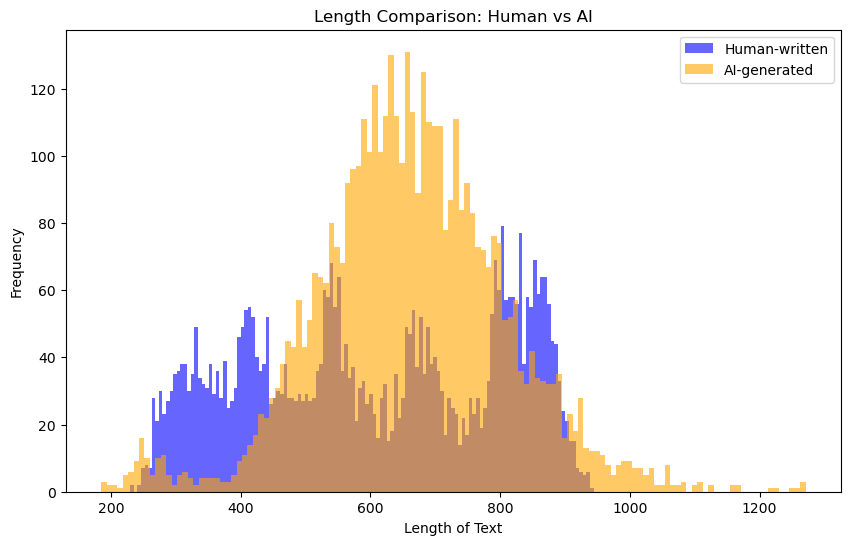

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

df_final_train = pd.read_csv(CFG.DF_FINAL_TRAIN_PATH) 

# Length 비교
df_final_train['text_length'] = df_final_train['text'].str.len()
human_lengths = df_final_train[df_final_train['label'] == 0]['text_length']
ai_lengths = df_final_train[df_final_train['label'] == 1]['text_length']

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(human_lengths, bins=130, alpha=0.6, label="Human-written", color="blue")
plt.hist(ai_lengths, bins=130, alpha=0.6, label="AI-generated", color="orange")
plt.title("Length Comparison: Human vs AI")
plt.xlabel("Length of Text")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### 사용 빈도가 높은 단어 Top 20 비교 (공백 기준으로 단어 분리)

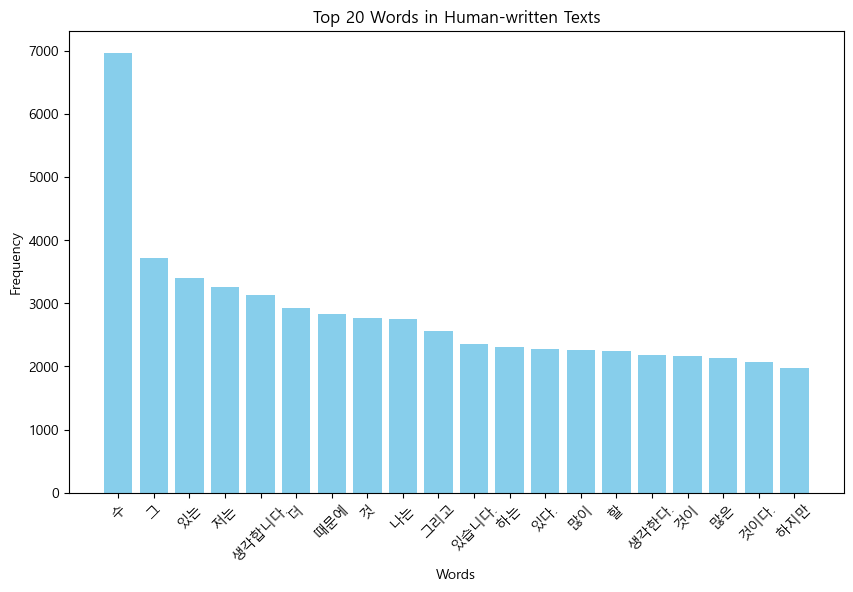

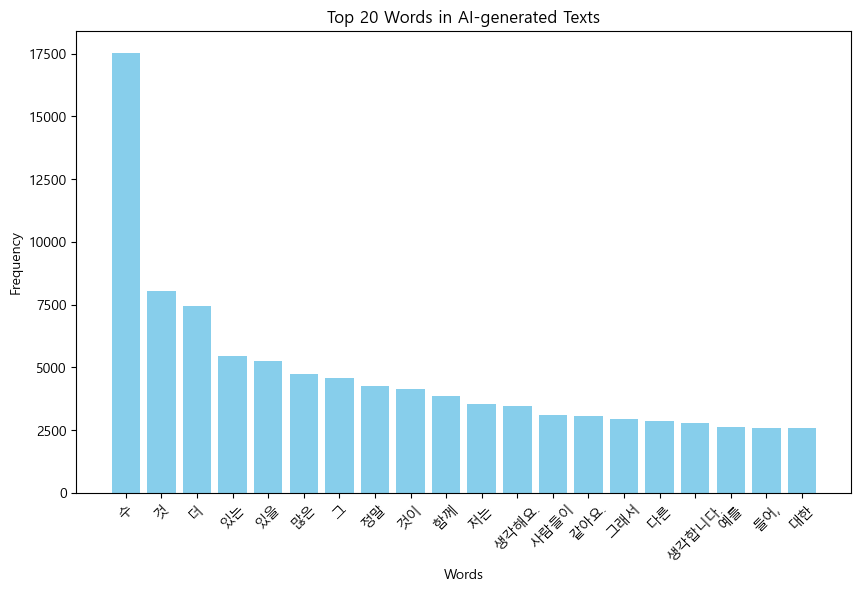

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

def get_top_words(texts, top_n=20):
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

human_texts = df_final_train[df_final_train['label'] == 0]['text']
ai_texts = df_final_train[df_final_train['label'] == 1]['text']

human_top_words = get_top_words(human_texts, 20)
ai_top_words = get_top_words(ai_texts, 20)

def plot_top_words(word_counts, title):
    words, counts = zip(*word_counts)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color="skyblue")
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(human_top_words, "Top 20 Words in Human-written Texts")
plot_top_words(ai_top_words, "Top 20 Words in AI-generated Texts")

### 사람만 쓰는 단어 VS AI만 쓰는 단어 (공백 기준으로 단어 분리)

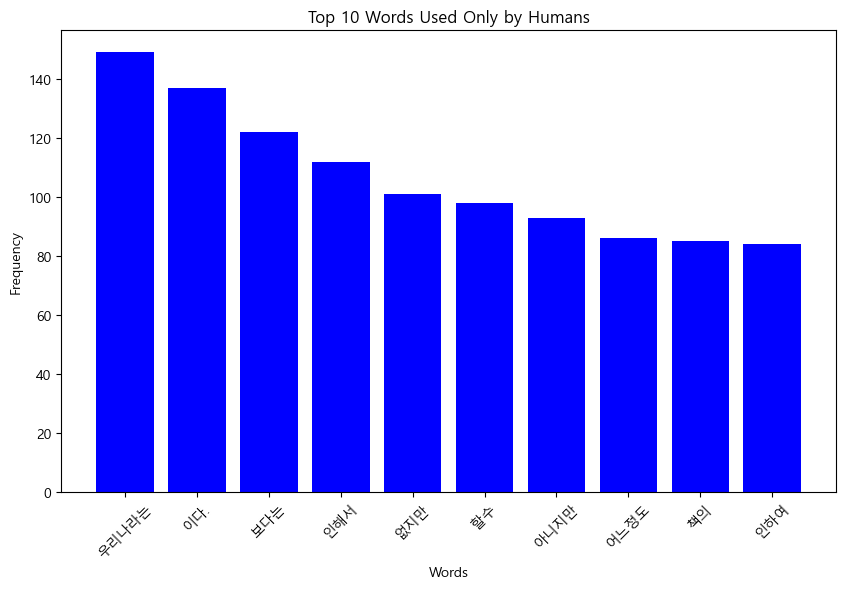

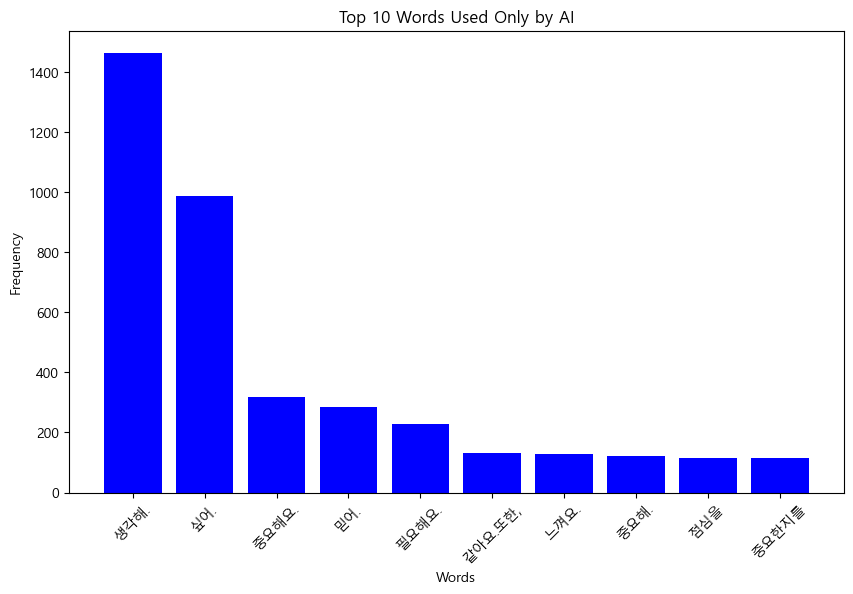

In [24]:
from collections import Counter
import matplotlib.pyplot as plt

human_words = set(word for text in human_texts for word in text.split())
ai_words = set(word for text in ai_texts for word in text.split())

# 사람만 사용한 단어와 AI만 사용한 단어
human_only_words = human_words - ai_words
ai_only_words = ai_words - human_words

# 빈도 계산
human_word_counts = Counter(word for text in human_texts for word in text.split() if word in human_only_words)
ai_word_counts = Counter(word for text in ai_texts for word in text.split() if word in ai_only_words)

human_only_top = human_word_counts.most_common(10) # 상위 10개 단어
ai_only_top = ai_word_counts.most_common(10) # 상위 10개 단어

def plot_unique_words(unique_words, title):
    words, counts = zip(*unique_words) 
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color="blue")
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# 사람만 사용한 단어 
plot_unique_words(human_only_top, "Top 10 Words Used Only by Humans")

# AI만 사용한 단어 
plot_unique_words(ai_only_top, "Top 10 Words Used Only by AI")